In [1]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python

!pip install opencv-python==4.4.0.44
!pip install opencv-contrib-python==4.4.0.44

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 49.5 MB 1.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 55.7 MB 1.3 MB/s 


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
cv.__version__

'4.4.0'

In [18]:
def get_kpoints_descriptors_sift(img1, img2):
    '''Creates sift object and finds keypoints and descriptors for images'''

    #create sift descriptor object
    sift = cv.xfeatures2d.SIFT_create()
    #detenct and compute keypoints and descriptors for imges
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    return (kp1, des1), (kp2, des2)

In [10]:
def cv_bf_matcher(des1, des2, kp1, kp2, topn=10):
    '''Creates brute force matcher and matches all mathes on output image'''

    #create matcher with recomended L1 norm
    matcher = cv.BFMatcher(normType=cv.NORM_L1)
    #get matches from two descriptors
    matches = matcher.match(des1,des2)
    #get top n matches based on distance
    top_matches = sorted(matches, key = lambda x : x.distance)[:topn]

    #returns image with matches
    matched_image = cv.drawMatches(img1,kp1,img2,kp2,top_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return matched_image

In [11]:
def custom_bf_matcher(des1, des2, kp1, kp2, topn=10):
    '''Custom implementation of BFMatcher match with L1 norm'''
    #iterate over descriptors and create descriptor objects for each descriptor
    matches = []
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            #append DMatch object for drawing Matches that contains distance between each descriptor in des1 and des2
            matches.append(cv.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
            
    #get top n matches based on distance
    top_matches = sorted(matches, key = lambda x : x.distance)[:topn]
    #returns image with matches
    matched_image = cv.drawMatches(img1,kp1,img2,kp2,top_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return matched_image

In [26]:
img1 = cv.imread('low_contrast_image_dog_rotated.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('low_contrast_image.jpg',cv.IMREAD_GRAYSCALE)

In [28]:
(kp1, des1), (kp2, des2) = get_kpoints_descriptors_sift(img1, img2)

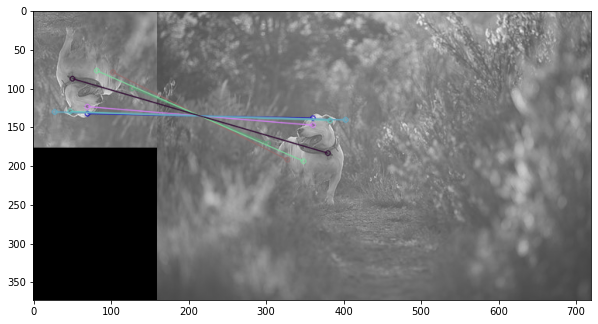

(<matplotlib.image.AxesImage at 0x7f0cbecb6650>, None)

In [32]:
cv_bf_img = cv_bf_matcher(des1, des2, kp1, kp2)
plt.figure(figsize=(10,10))
plt.imshow(cv_bf_img),plt.show()

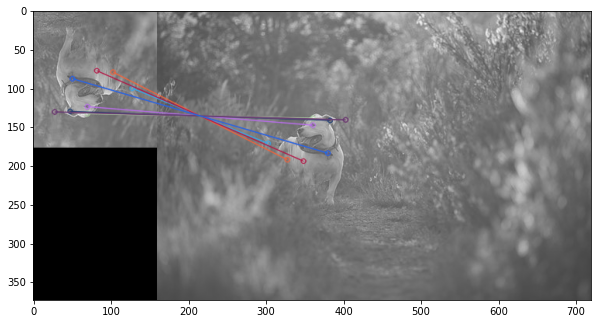

(<matplotlib.image.AxesImage at 0x7f0cbec3db90>, None)

In [33]:
custom_bf_img = custom_bf_matcher(des1, des2, kp1, kp2)
plt.figure(figsize=(10,10))
plt.imshow(custom_bf_img),plt.show()

In [46]:
img1 = cv.imread('low_contrast_image_dog_rotated.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('low_contrast_image.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

In [47]:
(kp1, des1), (kp2, des2) = get_kpoints_descriptors_sift(img1, img2)

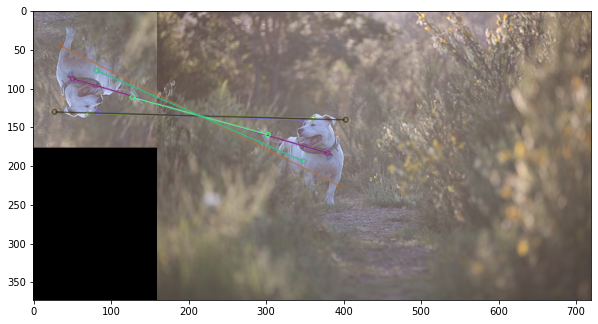

(<matplotlib.image.AxesImage at 0x7f0cbe903bd0>, None)

In [48]:
cv_bf_img = cv_bf_matcher(des1, des2, kp1, kp2)
plt.figure(figsize=(10,10))
plt.imshow(cv_bf_img),plt.show()

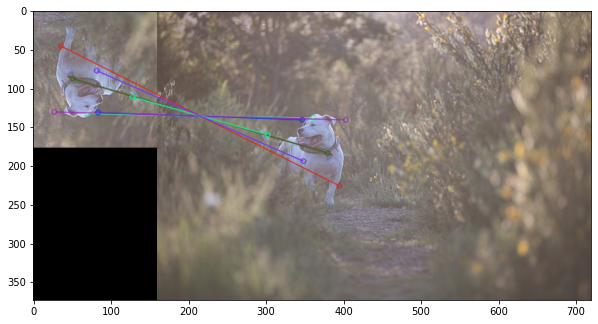

(<matplotlib.image.AxesImage at 0x7f0cbe870dd0>, None)

In [49]:
custom_bf_img = custom_bf_matcher(des1, des2, kp1, kp2)
plt.figure(figsize=(10,10))
plt.imshow(custom_bf_img),plt.show()

In [58]:
img1 = cv.imread('high_contrast_img_boat.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('high_contrast_img.jpg',cv.IMREAD_GRAYSCALE)
(kp1, des1), (kp2, des2) = get_kpoints_descriptors_sift(img1, img2)

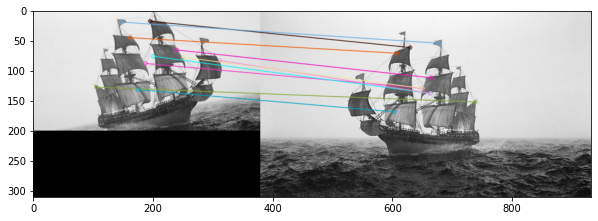

(<matplotlib.image.AxesImage at 0x7f0c6c99c9d0>, None)

In [60]:
cv_bf_img = cv_bf_matcher(des1, des2, kp1, kp2)
plt.figure(figsize=(10,10))
plt.imshow(cv_bf_img),plt.show()

In [61]:
img1 = cv.imread('high_contrast_img_boat.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('high_contrast_img.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

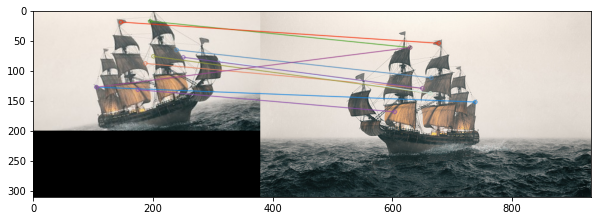

(<matplotlib.image.AxesImage at 0x7f0b70764810>, None)

In [62]:
custom_bf_img = custom_bf_matcher(des1, des2, kp1, kp2)
plt.figure(figsize=(10,10))
plt.imshow(custom_bf_img),plt.show()